In [1]:
import numpy.random as rand
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

# Задача 47

Убедиться в асимптотической нормальности оценки максимального правдоподобия.
Для этого выбрать распределение $\Gamma(\theta, 1)$ и для k = 100 выборок объёма 200 получить выборку $\hat{\theta_{1}}, \hat{\theta_{2}}, ..., \hat{\theta_{k}}$, построить гистограмму и сравнить её с теоретической зависимостью.

## Решение

Функция правдоподобия выборки: <br>
$$L(x, \theta) =  \prod_{i=1}^{n}\frac{1}{\theta} e^{-\frac{x_i}{\theta}} = \frac{1}{\theta^{n}} e^{-\frac{1}{\theta} \sum\limits_{i=1}^{n} x_i }$$<br>
$$ \ln L(x, \theta) = -\frac{1}{\theta}\sum\limits_{i=1}^{n} x_i - n\ln \theta$$<br>
Находим оценку максимального правдоподобия:<br>
$$\frac{\partial \ln L}{\partial \theta} = \frac{1}{\hat{\theta}^2}\sum\limits_{i=1}^{n} x_i - \frac{n}{\hat{\theta}} = 0$$<br>
$$\hat{\theta} = \frac{1}{n}\sum\limits_{i=1}^{n} x_i = \overline{X}$$

## Теоретическая зависимость
<center>$L\left(\sqrt{n}\left(\hat{\theta}_{n} - \theta \right)\right) \rightarrow N\left( 0, I^{-1} \left( \theta \right) \right)$, где $I\left( \theta \right)$ - информационная матрица одного наблюдения </center><br>
<center>$I(\theta) = I_{1}(\theta) = \mathbb{E}_{\theta} \left( \frac{\partial \: ln \: L\left( X_1, \theta \right)}{\partial \theta_{i}} \frac{\partial \: ln \: L\left( X_1, \theta \right)}{\partial \theta_{j}} \right) $ </center><br><br>

В нашем случае: $$I(\theta) = \mathbb{E}_{\theta} \left( \frac{\partial \: ln \: L\left( X_1, \theta \right)}{\partial \theta}\right)^{2} = \int\limits_{0}^{+\infty}\frac{1}{\Gamma(n)\theta^{n}}\left(\frac{x}{\theta} - \frac{e^{-x/\theta}}{\theta} \right)^{2}dx = \frac{1}{\theta^2}$$<br><br>

Таким образом: $$ L\left(\sqrt{n}\left(\hat{\theta}_{n} - \theta \right)\right) \rightarrow N\left( 0, \theta^{2} \right) $$<br><br><br><br>




In [64]:
theta = 1.0
samples_count = 1000
sample_vol = 100
samples = rand.gamma(1, scale=theta, size=(samples_count, sample_vol))

In [65]:
theta_est = []

for sample in samples:
    theta_est.append(sample.sum()/sample_vol)

In [66]:
sigma = theta**2
T = (theta_est - np.ones(samples_count)*theta)*np.sqrt(sample_vol)/np.sqrt(sigma)

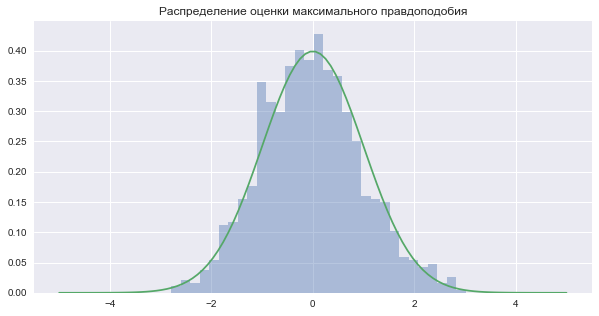

In [67]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(T, norm_hist=True, kde=False, bins = int(samples_count**0.5))
x = np.linspace(-5, 5, 100)
plt.title(u'Распределение оценки максимального правдоподобия')
plt.plot(x, stat.norm.pdf(x, loc=0.0, scale=1.0))
plt.show()